['#001c7f', '#b1400d', '#12711c', '#8c0800', '#591e71', '#592f0d', '#a23582', '#3c3c3c', '#b8850a', '#006374']


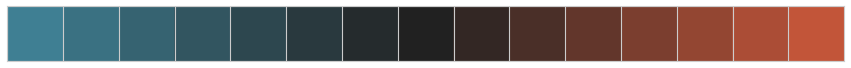

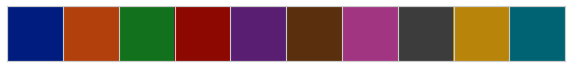

In [10]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

import itertools

sns.set_palette("dark", 10)
sns.palplot(sns.color_palette(sns.diverging_palette(220, 20, n=15, center='dark')))
print((sns.color_palette('dark', 10)).as_hex())
sns.palplot(sns.color_palette('dark', 10))

In [20]:
df = pd.read_csv('data/SpotifyFeatures.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

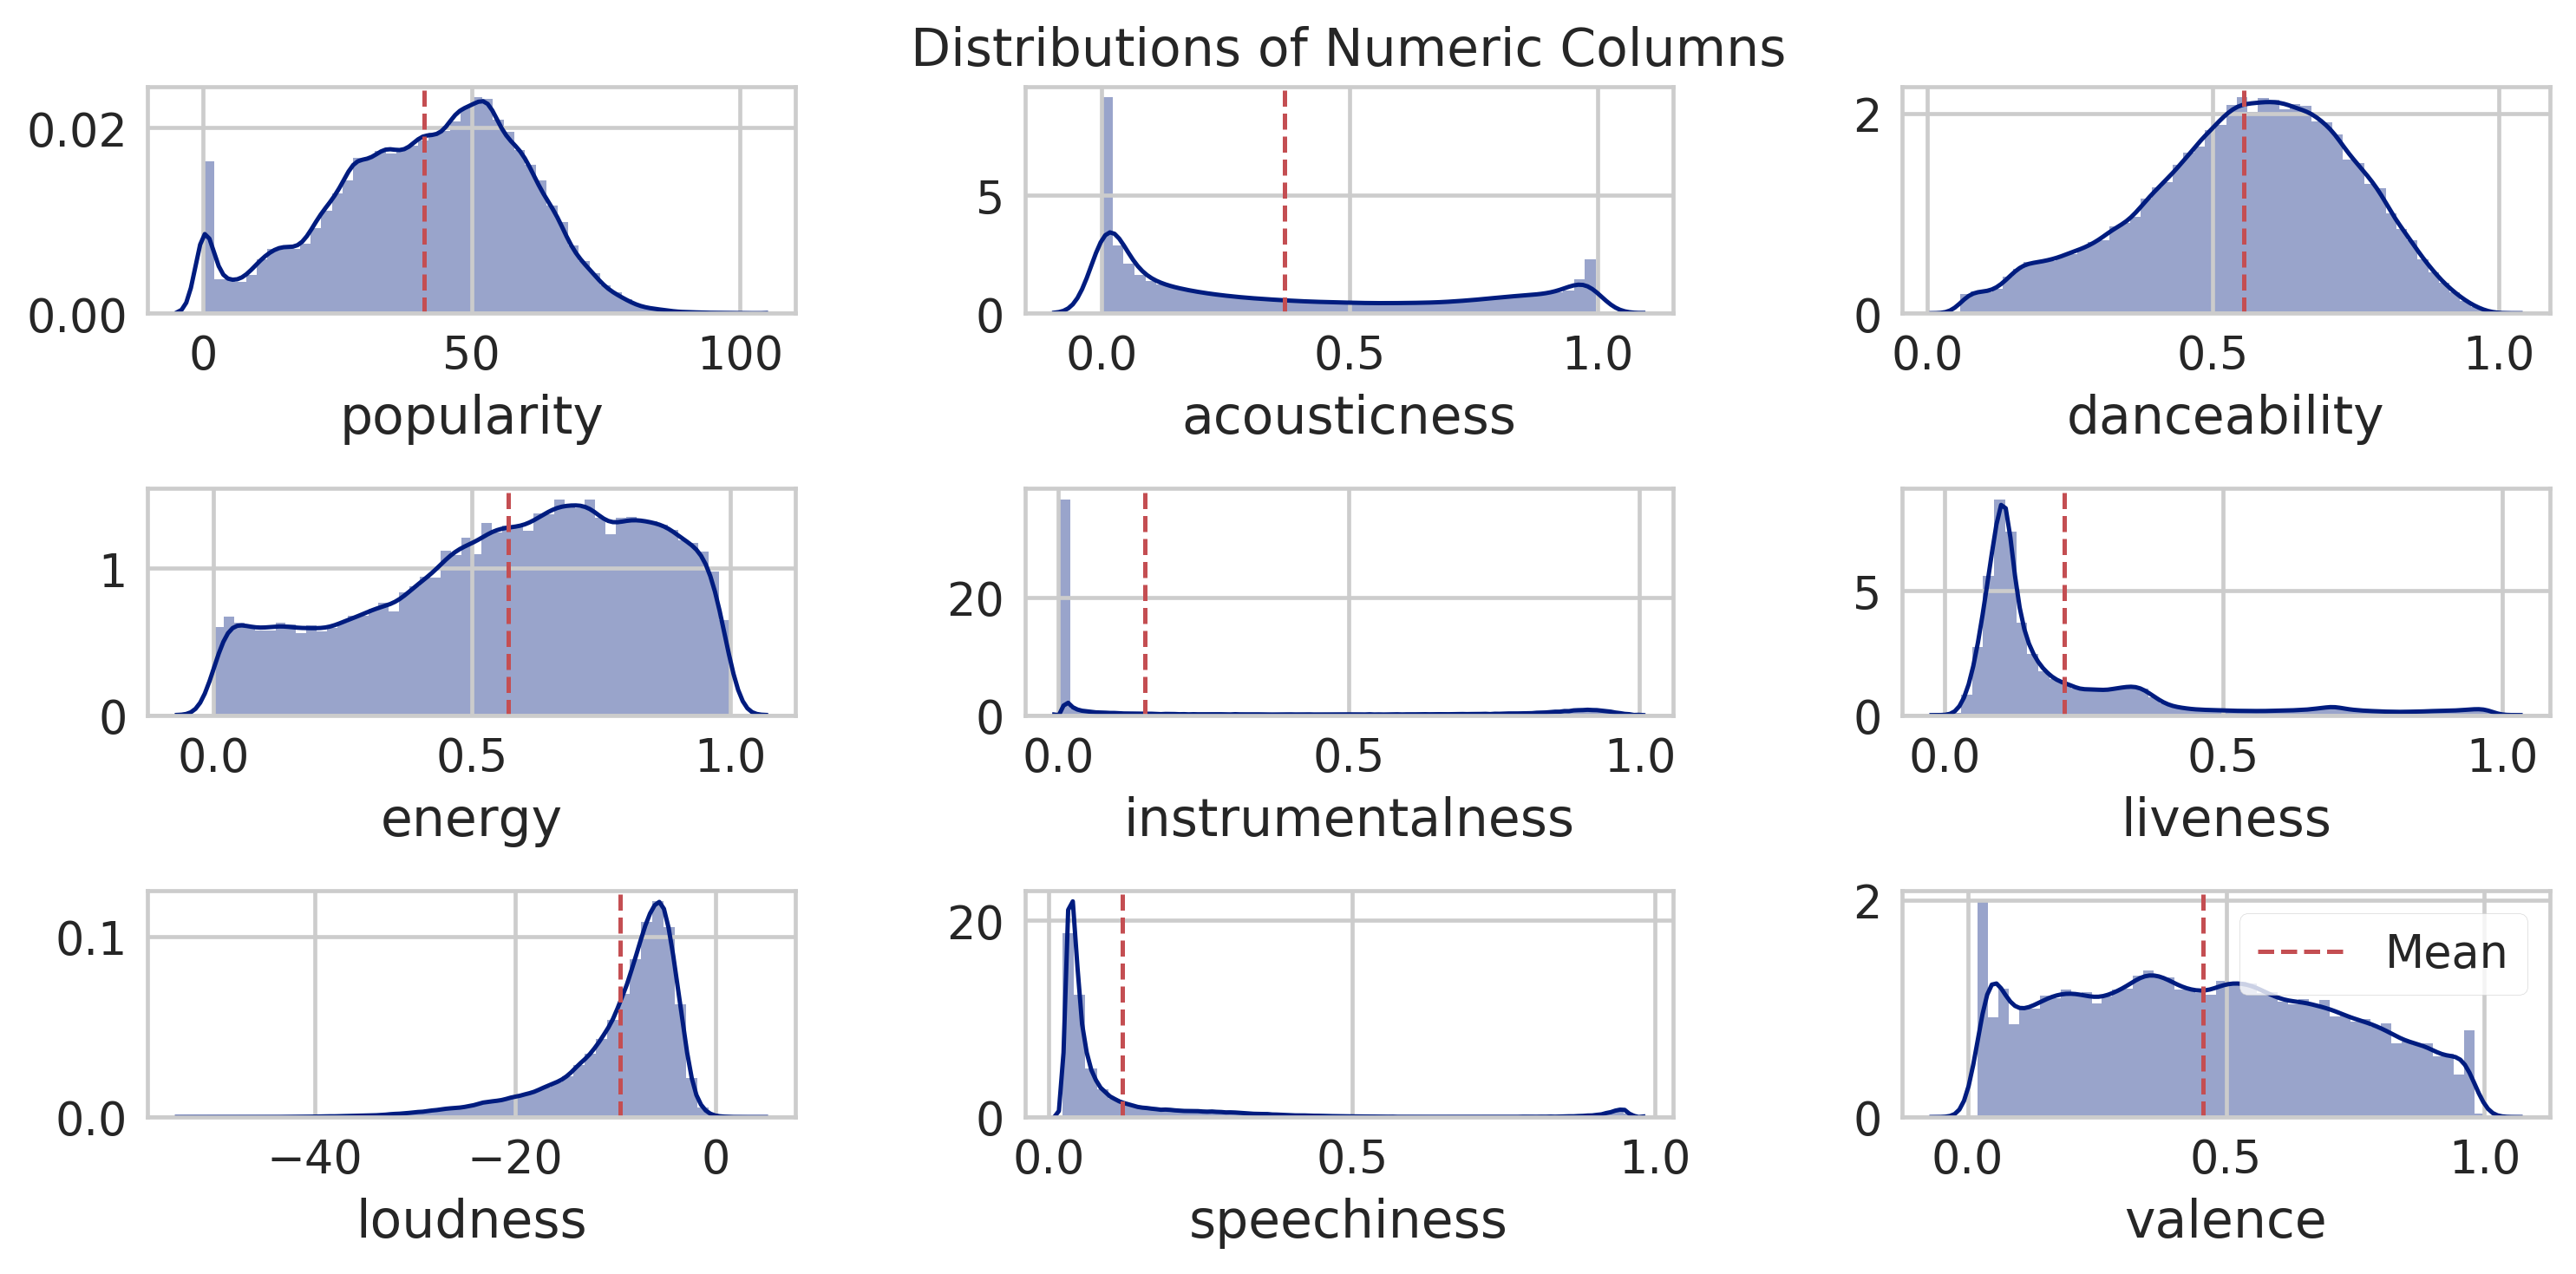

In [30]:
numeric_columns = ['popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']

fig, axes = plt.subplots(3,3, figsize = [10,5], dpi=300)

for i, column in enumerate(numeric_columns):
    
    if i == 1:
        axes[i//3, i%3].set_title('Distributions of Numeric Columns')
    
    sns.distplot(df[column].dropna(), ax=axes[i//3, i%3], norm_hist=True)
    
    mean = df[column].mean()
    axes[i//3, i%3].axvline(mean, color='r', linestyle='--')

    
plt.legend({'Mean':mean}, loc='upper right')
fig.tight_layout()
fig.savefig('images/dists of numeric columns.png')

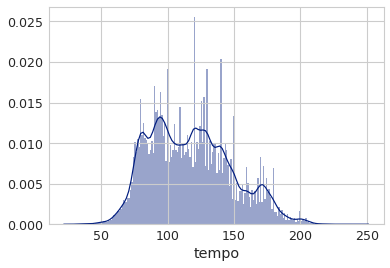

In [5]:
sns.distplot(df['tempo'], bins=200)

In [6]:
fig.savefig('dists_of_numeric_metrics.png')

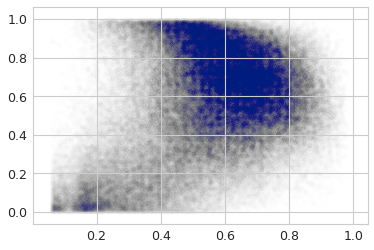

In [6]:
plt.scatter(x='danceability', y='energy', data=df, alpha=0.005)
# plt.legend()

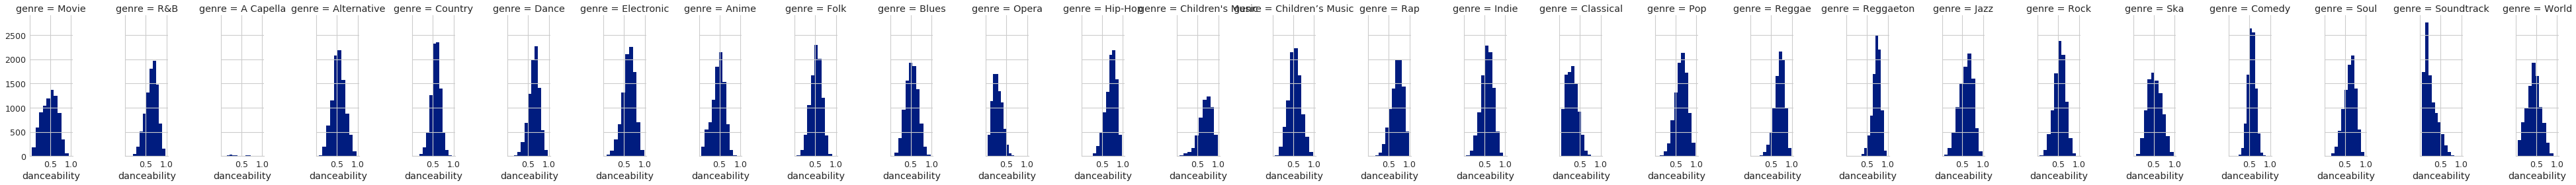

In [7]:
g = sns.FacetGrid(df, col='genre', height=4, aspect=.5)
g = g.map(plt.hist, 'danceability')
g.savefig('danceability.png')

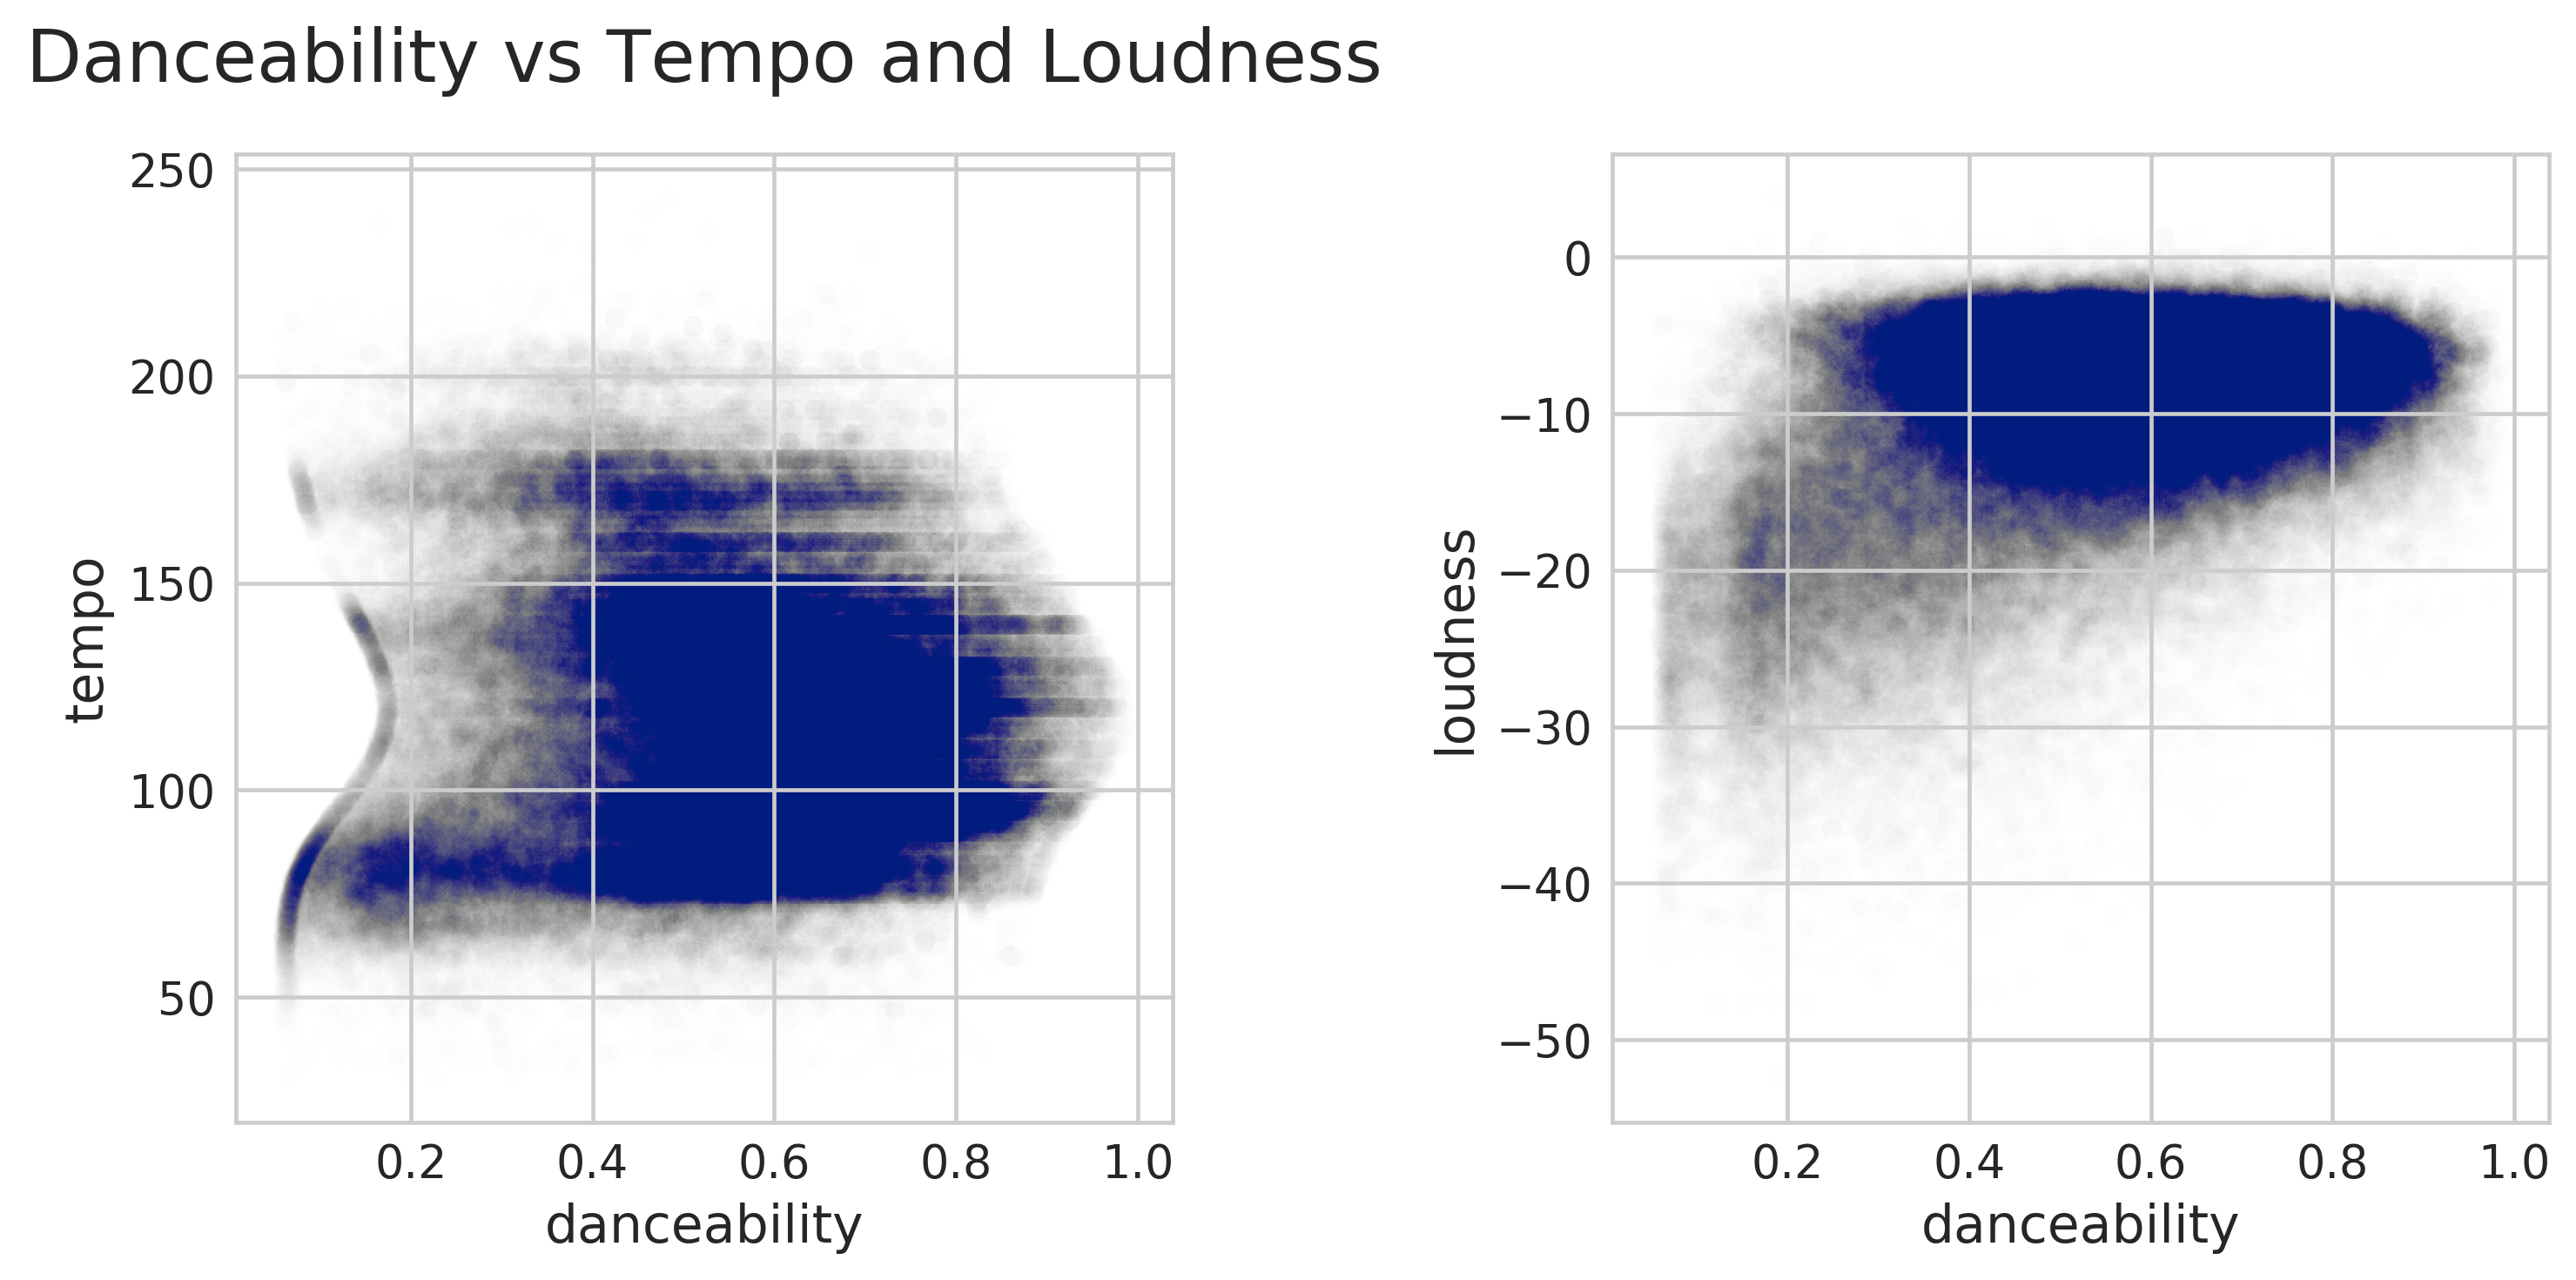

In [8]:
objective_metrics = ['tempo', 'loudness']

fig, axs = plt.subplots(1,2, figsize=[10,5], dpi=300)



for i, column in enumerate(objective_metrics):
    axs[i].scatter(x='danceability', y=column, data=df, alpha=0.005, c='#001c7f')
    axs[i].set_xlabel('danceability')
    axs[i].set_ylabel(objective_metrics[i])

axs[0].set_title('Danceability vs Tempo and Loudness', loc='center', pad=20, fontdict={'fontsize': 20})

plt.tight_layout()
    
fig.savefig('danceability vs objectives.png')

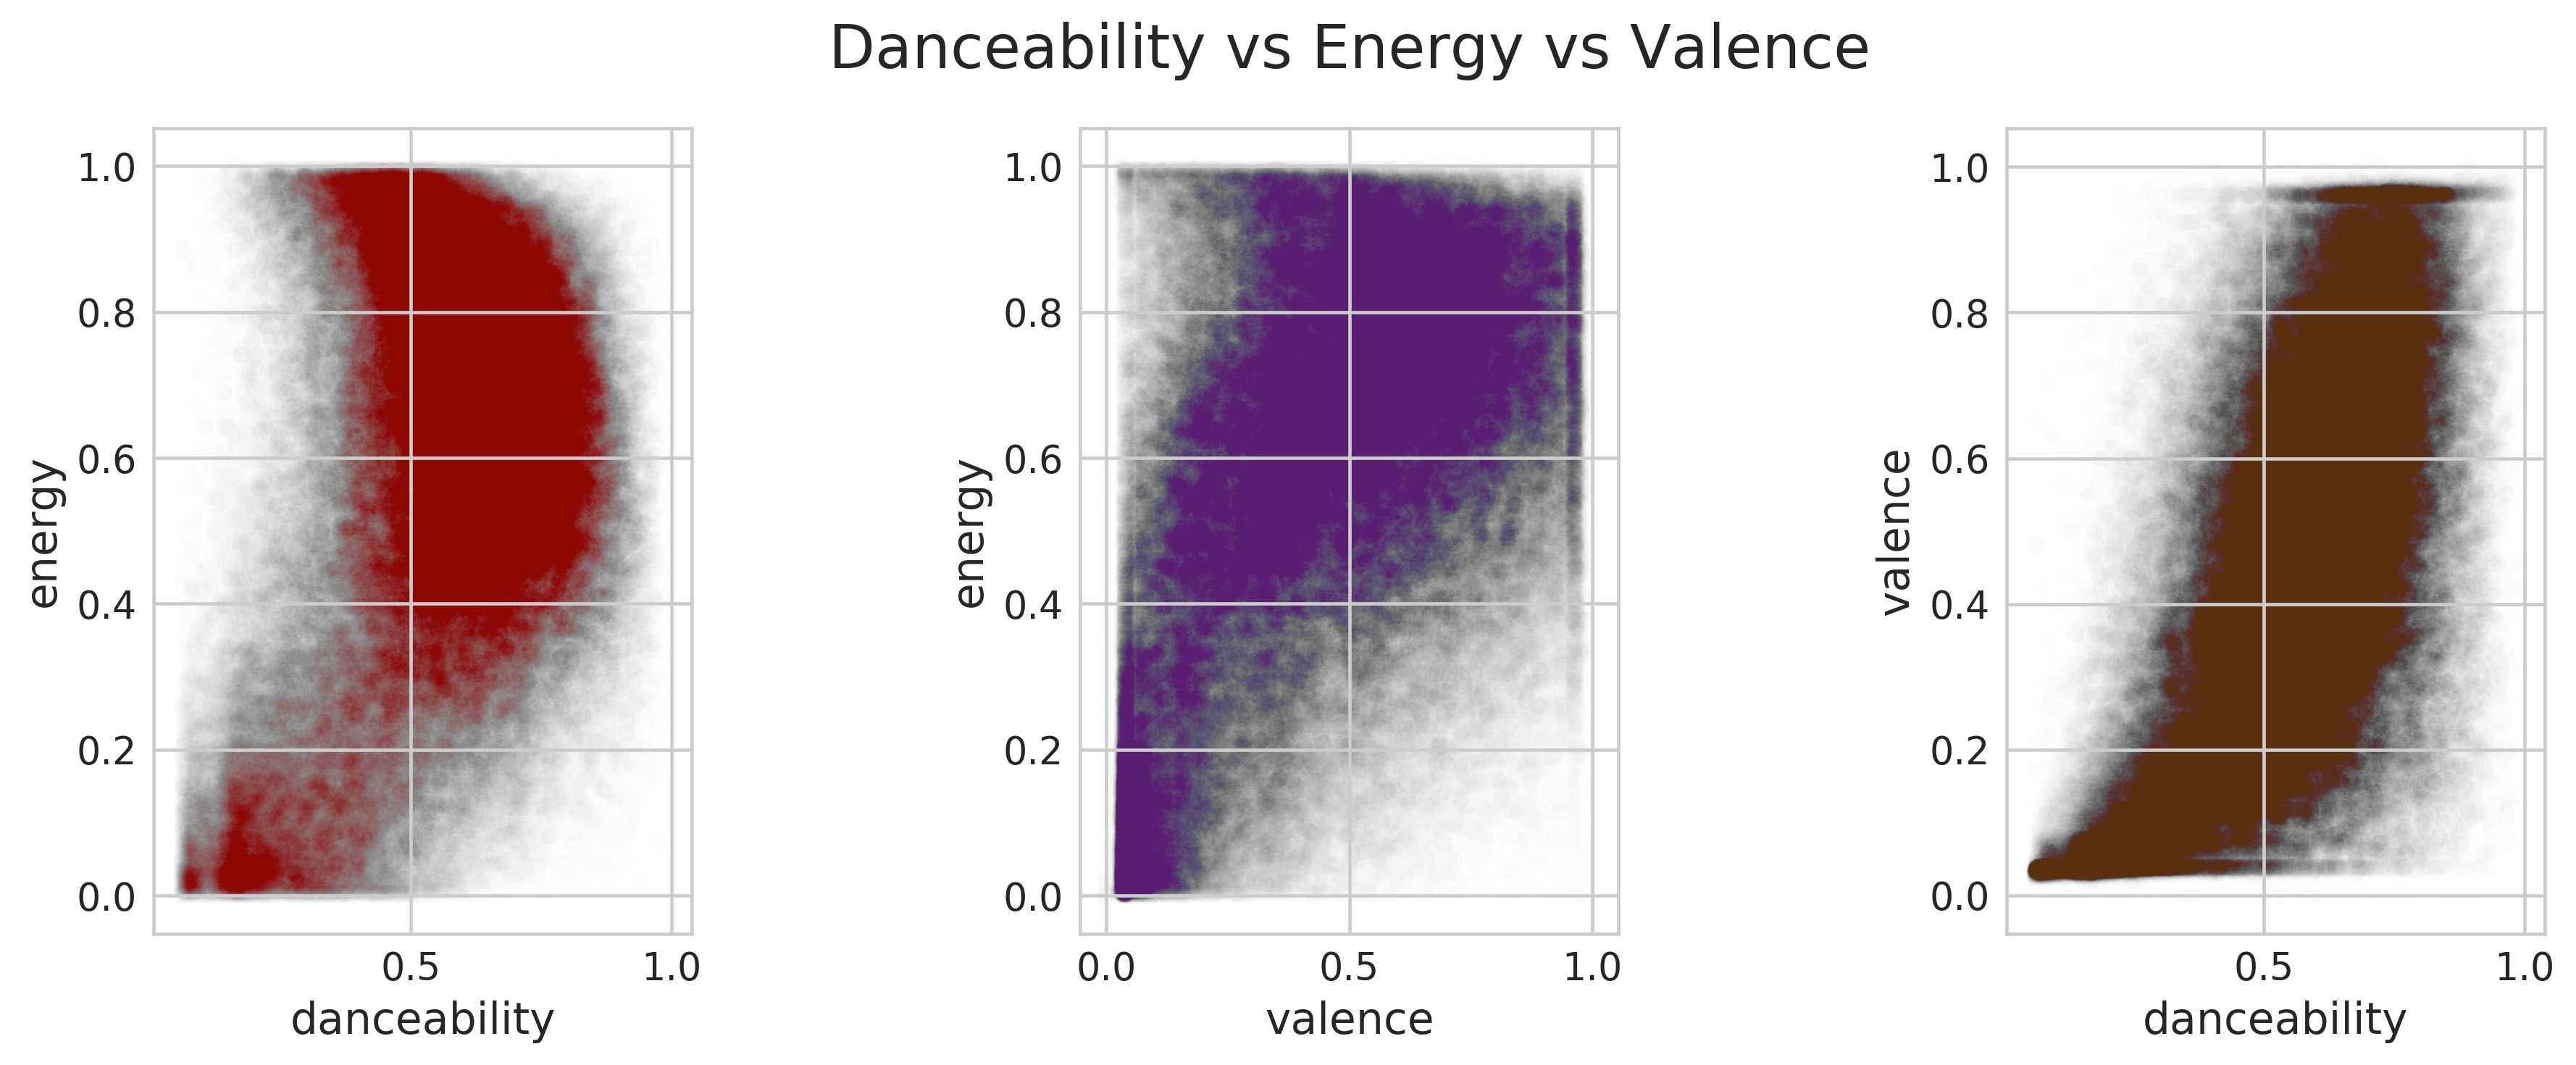

In [32]:
subjective_metrics = ['danceability', 'energy', 'valence']

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=[12,5], dpi=300)


ax1.scatter(x='danceability', y='energy', data=df, alpha=0.005, c='#8c0800')
ax1.set_xlabel('danceability')
ax1.set_ylabel('energy')

ax2.scatter(x='valence', y='energy', data=df, alpha=0.005, c='#591e71')
ax2.set_xlabel('valence')
ax2.set_ylabel('energy')

ax3.scatter(x='danceability', y='valence', data=df, alpha=0.005, c='#592f0d')
ax3.set_xlabel('danceability')
ax3.set_ylabel('valence')

ax2.set_title('Danceability vs Energy vs Valence', loc='center', pad=20, fontdict={'fontsize': 20})
plt.tight_layout()

In [33]:
fig.savefig('subjectives comparisons.png')

## Plot subjective metrics vs 5 genres

In [16]:
test = df[df['genre'] == 'opera']
df.genre.unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

Text(0.5, 1.0, 'Danceability, Energy, Valence vs 5 Genres')

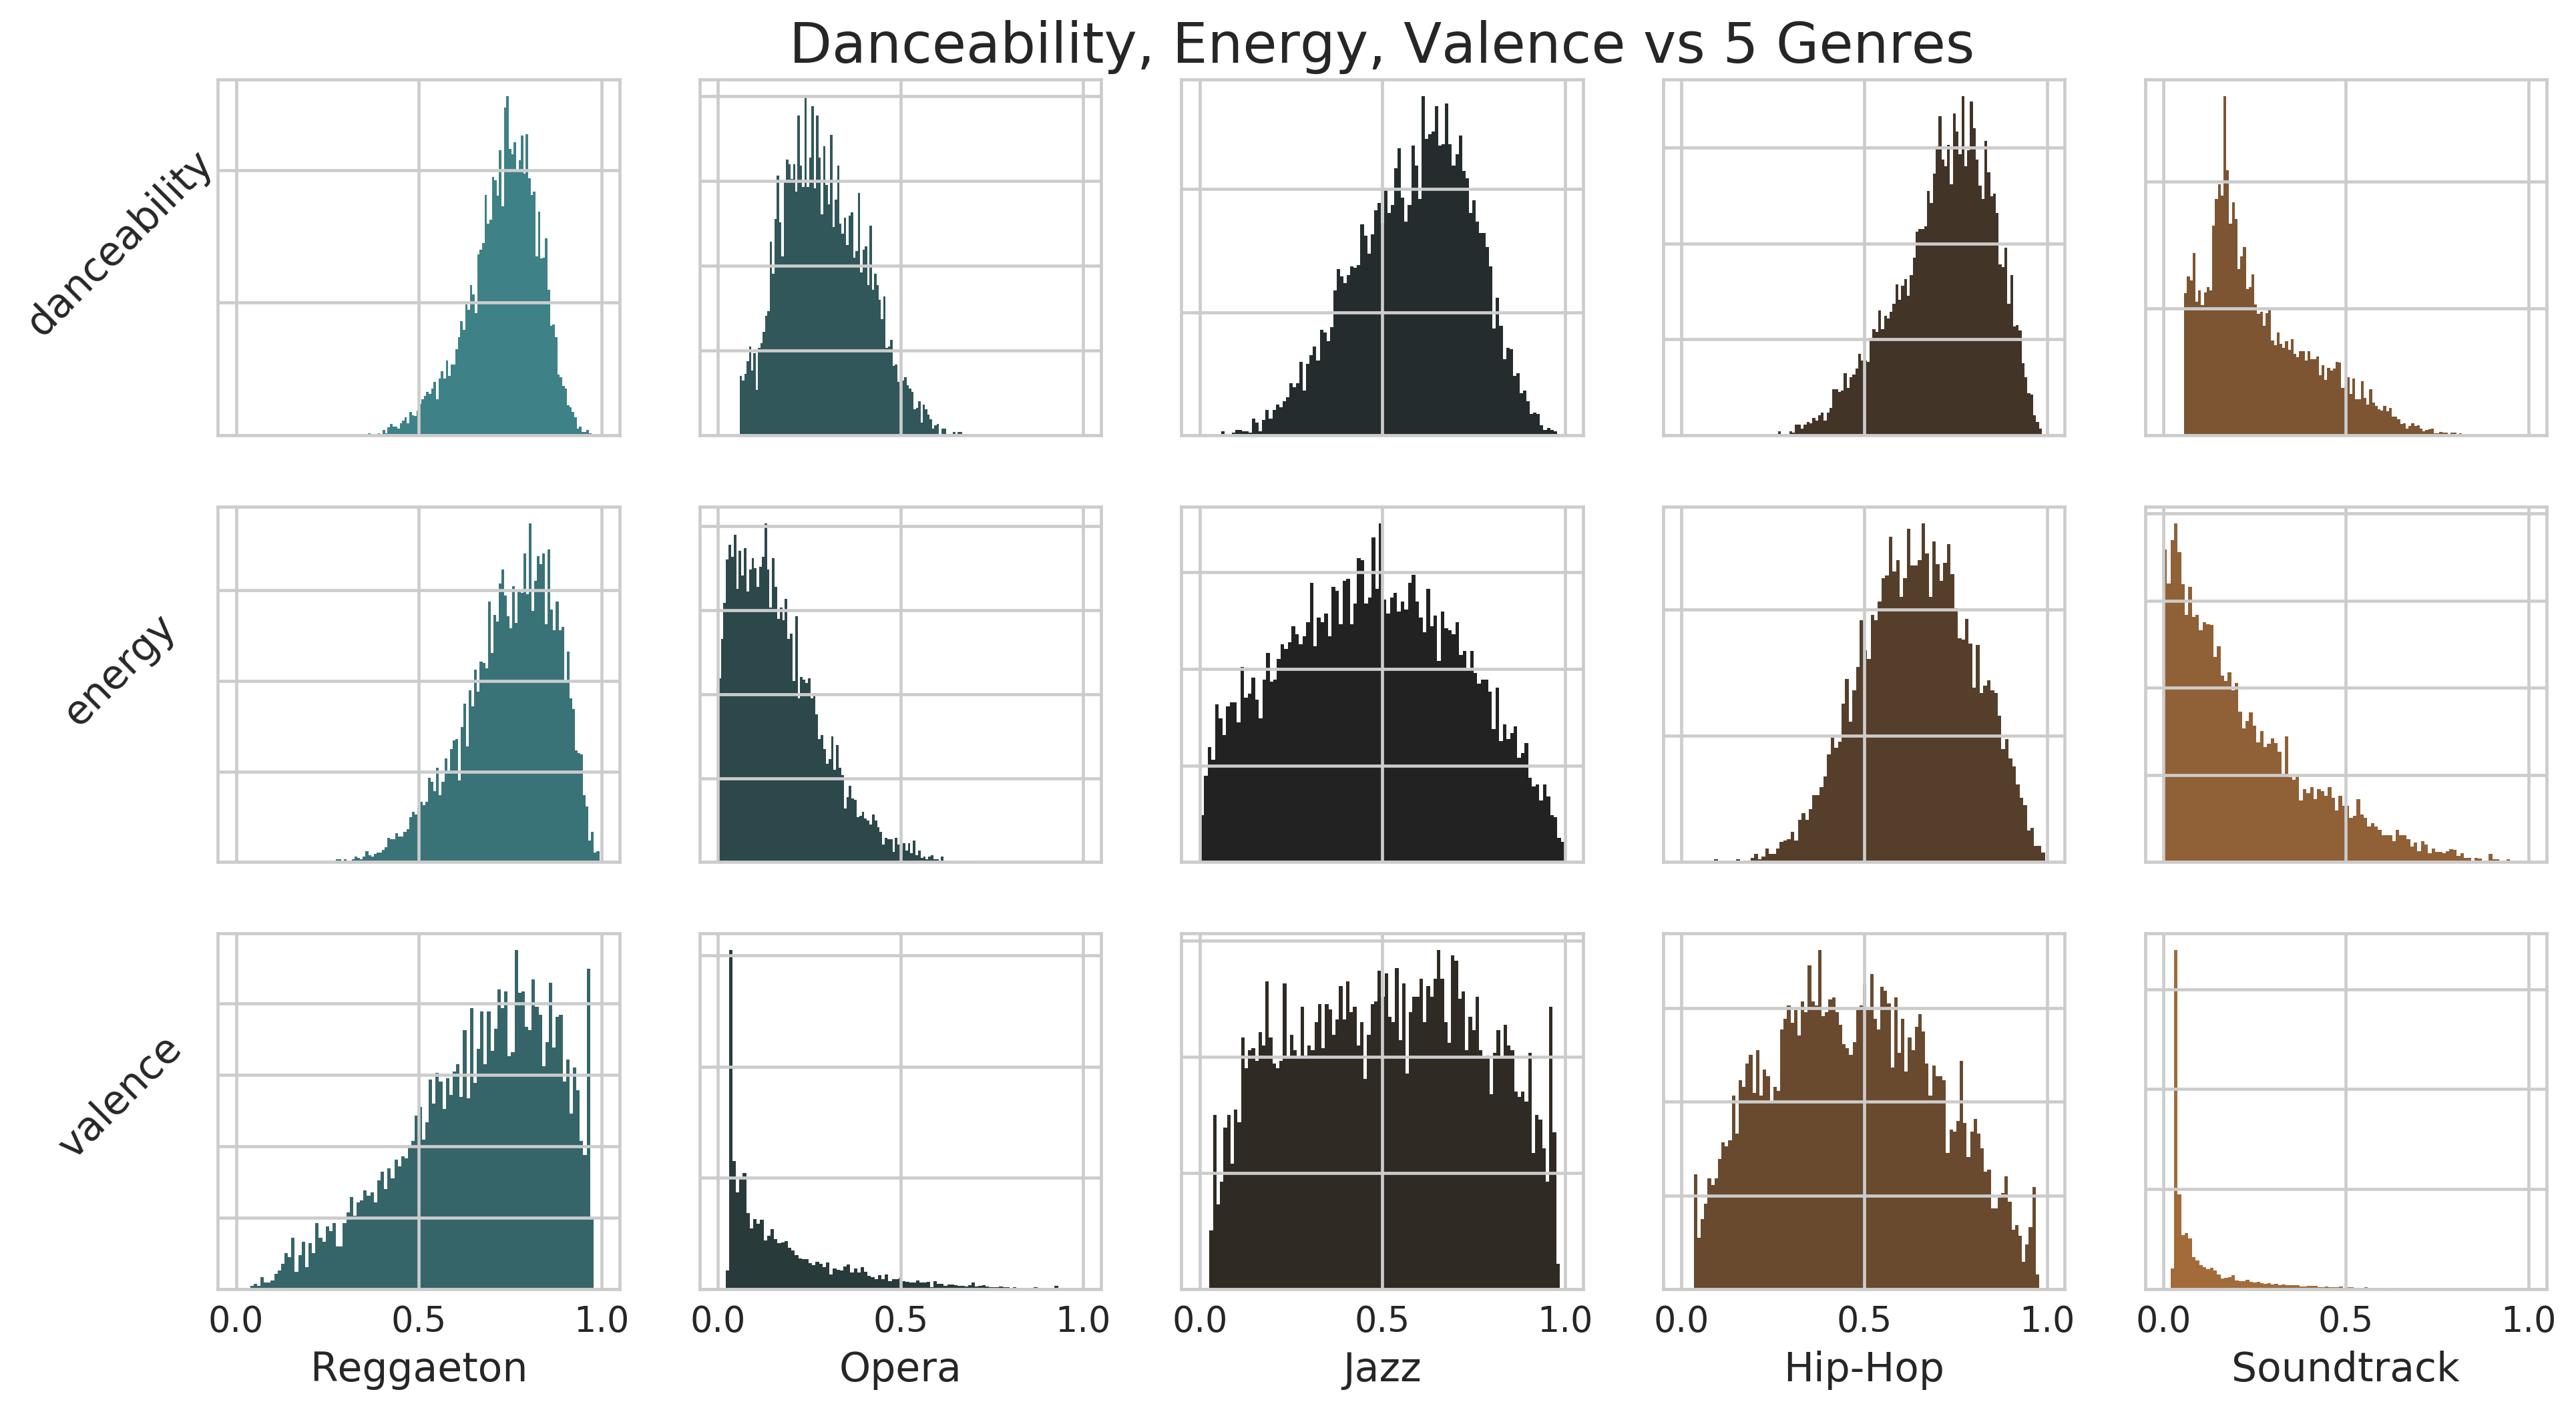

In [17]:
subjective_metrics = ['danceability', 'energy', 'valence']
genres = ['Reggaeton', 'Opera', 'Jazz', 'Hip-Hop', 'Soundtrack']
five_genres = [df[df['genre'] == genre] for genre in genres]

# colors = (sns.cubehelix_palette(15, start=0, rot=6, light=0.5, dark=0.3)).as_hex()
colors = sns.color_palette(sns.diverging_palette(200, 40, n=15, center='dark'))

fig, axs = plt.subplots(3,5, figsize=[15,8], dpi=300, sharex=True)

color_count = -1

for i, genre in enumerate(five_genres):
    for j, metric in enumerate(subjective_metrics):
        color_count += 1
        axs[j,i].hist(genre[metric], density=True, bins=100, color=colors[color_count])
        
        if i == 0:
            axs[j,i].set_ylabel(metric, rotation=45, labelpad=30)
            
        if j == 2:
            axs[j,i].set_xlabel(genres[i])
            
        axs[j,i].tick_params(axis='y', which='both',left=False, labelleft=False)
        
        
    
        
axs[0,2].set_title('Danceability, Energy, Valence vs 5 Genres', loc='center', fontdict={'fontsize': 20})


In [18]:
fig.savefig('5 genres subjectives.png')

/home/ww/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

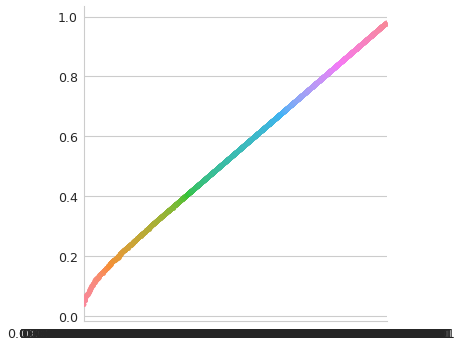

In [19]:
for genre in five_genres:
    sns.catplot(x=genre[metric], y=metric, data=genre)
